In [1]:
from utils import Utils
from imputation import Imputation
from amputation import Amputation

/home/sohini/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-11-22 14:44:38.868363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-11-22 14:44:38.868392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Load the data

In [2]:
# give your data's specifics instead

algo="dl_feat"
category = "W"
dataset_number = 1
folder_path="/mnt/hdd/sohini-globem-work/GLOBEM/"

u = Utils(folder_path=folder_path, algo=algo, category = category, dataset_number = dataset_number)

rapids, rapids_subset, date_map, index_to_dates, users, user_to_id = u.load_and_preprocess()

Dataset length: 14260
Number of features: 54


In [3]:
df_percentages = u.get_not_null_percentages()

f_wifi has ≤ 1 column, skipping.


### Ampute the data

In [4]:
a = Amputation(rapids, rapids_subset, users, algo = algo)

In [5]:
amputed_df,amputed_data_indices,amputed_count,amputed_avg = a.ampute()
# amputed_df,amputed_data_indices,amputed_count,amputed_avg = a.ampute(amputation_type="mnar_ii", lower_percentile=34,upper_percentile=68)

Amputing 10.0% of non-null data randomly per user-column...


100%|█████████████████████████████████████████| 155/155 [00:13<00:00, 11.86it/s]


Overall mean amputed ratio: 0.0562


### Impute the data

In [6]:
i = Imputation(amputed_df, amputed_df, users, index_to_dates, algo = algo)

In [7]:
sknn_df = i.simple_knn()
# mice_df = i.mice()

100%|█████████████████████████████████████████| 155/155 [00:14<00:00, 11.05it/s]


### Calculate loss & plot it

In [8]:
imputations_dict={"simple_knn":sknn_df}
# imputations_dict={"simple_knn":sknn_df, "mice":mice_df}

In [9]:
loss=a.calculate_loss(imputations_dict)

100%|█████████████████████████████████████████| 155/155 [00:17<00:00,  8.78it/s]


In [10]:
for user in loss.keys():
    loss[user]["data%"] = float(df_percentages.loc[df_percentages["pid"] == user]["percentage__"])

Number of users in loss file: 155


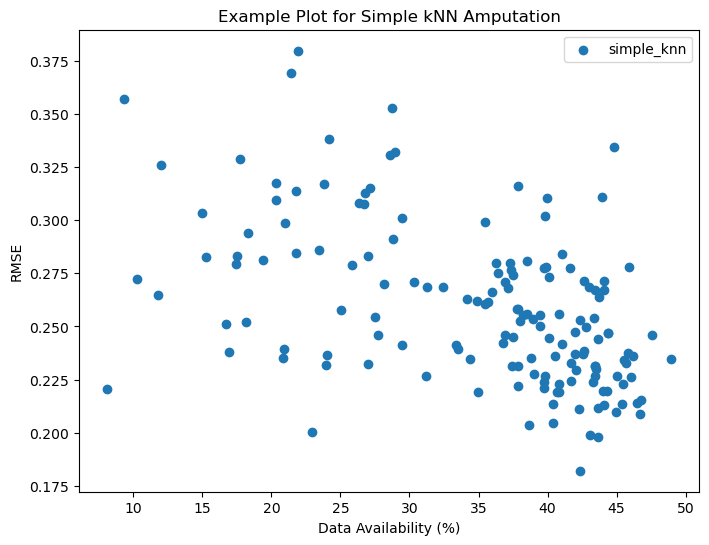

In [11]:
loss_plot = a.display_loss(loss, types=list(imputations_dict.keys()), remove_outliers=False, percentile_removed=0.05)
loss_plot.title("Example Plot for Simple kNN Amputation")
loss_plot.show()